# Assignment: Exercise 09: Fashion MNIST with convnet

Mariia Chernova id: 1908135

Use a convolutional network with overall structure: 

(1-2 * convolution layers; pooling layer) * 1-3

dense layer * 1-2

softmax

to train a network to classify fashion MNIST data set (it is available in keras datasets collection). Analyse model performance; can you beat your dense network performance?

In [8]:
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import argmax
from keras.datasets import fashion_mnist

In [9]:
def plot_loss_function(hist):
    plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'], 'b')
    plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'], 'r')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training loss", "Validation loss"])
    plt.title("Loss function diagram")
    plt.show()
    
def plot_accuracy_function(hist):
    plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['acc'], 'b')
    plt.plot(range(1, len(hist.history['val_acc']) + 1), hist.history['val_acc'], 'r')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Training accuracy", "Validation accuracy"])
    plt.title("Accuracy function diagram")
    plt.show()

# Download and explore Fashion-mnist dataset

In [13]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)
y_test.shape (10000,)


Check feature values

In [14]:
x_train.reshape(x_train.shape[0], 1, 28, 28).shape

(60000, 1, 28, 28)

In [15]:
print("x min: " + str(x_train.reshape(-1).min()))
print("x max: " + str(x_train.reshape(-1).max()))

x min: 0
x max: 255


Check distribution of labels

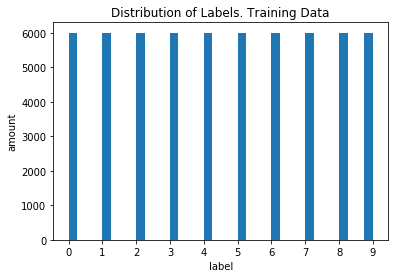

In [16]:
plt.hist(y_train, bins='auto')
plt.xticks(range(10))
plt.title("Distribution of Labels. Training Data")
plt.xlabel("label")
plt.ylabel("amount");

Visualize example image data

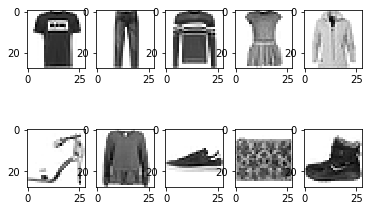

In [17]:
fig, ax = plt.subplots(2,5)
ax = ax.flatten()

for i in range(10):
    im_idx = np.argwhere(y_train == i).reshape(-1)[0]
    plottable_image = np.reshape(x_train[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')

Let's normalize our data

In [18]:
scaled_x_train = (x_train / 255).reshape(x_train.shape[0], 28, 28, 1)
scaled_x_test = (x_test / 255).reshape(x_test.shape[0], 28, 28, 1)

y_train_1hot = keras.utils.to_categorical(y_train)
y_test_1hot = keras.utils.to_categorical(y_test)

print("scaled_x_train.shape", scaled_x_train.shape)
print("y_train_1hot.shape", y_train_1hot.shape)
print("scaled_x_test.shape", scaled_x_test.shape)
print("y_test_1hot.shape", y_test_1hot.shape)

scaled_x_train.shape (60000, 28, 28, 1)
y_train_1hot.shape (60000, 10)
scaled_x_test.shape (10000, 28, 28, 1)
y_test_1hot.shape (10000, 10)


# Convolutional Neural Network

## Build&train model. Convolutional Neural Network

In [20]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [21]:
input_shape = scaled_x_train.shape[1:]
num_classes = len(np.unique(y_train))

In [73]:
model = keras.models.Sequential()
# (1-2 * convolution layers; pooling layer) * 1-3
model.add(Conv2D(20, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(Conv2D(20, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(10, kernel_size=3, activation="relu"))
model.add(Conv2D(10, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# dense layer * 1-2
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# softmax
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 20)        3620      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 10)        1810      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 10)          910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)              

In [74]:
hist = model.fit(scaled_x_train, y_train_1hot, epochs=100, batch_size=64, validation_data=(scaled_x_test, y_test_1hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 47s 791us/step - loss: 1.1931 - acc: 0.5727 - val_loss: 0.7216 - val_acc: 0.7226
Epoch 2/100
60000/60000 [==============================] - 44s 726us/step - loss: 0.6235 - acc: 0.7704 - val_loss: 0.6029 - val_acc: 0.7806
Epoch 3/100
60000/60000 [==============================] - 43s 720us/step - loss: 0.5580 - acc: 0.7952 - val_loss: 0.5627 - val_acc: 0.7951
Epoch 4/100
60000/60000 [==============================] - 37s 615us/step - loss: 0.5194 - acc: 0.8091 - val_loss: 0.5431 - val_acc: 0.8024
Epoch 5/100
60000/60000 [==============================] - 38s 628us/step - loss: 0.4906 - acc: 0.8202 - val_loss: 0.5353 - val_acc: 0.8041
Epoch 6/100
60000/60000 [==============================] - 37s 613us/step - loss: 0.4685 - acc: 0.8289 - val_loss: 0.5359 - val_acc: 0.7972
Epoch 7/100
60000/60000 [==============================] - 41s 691us/step - loss: 0.4477 - acc: 0.8365 - val_l

Epoch 59/100
60000/60000 [==============================] - 38s 640us/step - loss: 0.2378 - acc: 0.9121 - val_loss: 0.3311 - val_acc: 0.8825
Epoch 60/100
60000/60000 [==============================] - 36s 605us/step - loss: 0.2369 - acc: 0.9130 - val_loss: 0.3156 - val_acc: 0.8921
Epoch 61/100
60000/60000 [==============================] - 37s 612us/step - loss: 0.2349 - acc: 0.9134 - val_loss: 0.3129 - val_acc: 0.8888
Epoch 62/100
60000/60000 [==============================] - 38s 634us/step - loss: 0.2328 - acc: 0.9142 - val_loss: 0.3180 - val_acc: 0.8848
Epoch 63/100
60000/60000 [==============================] - 41s 686us/step - loss: 0.2302 - acc: 0.9157 - val_loss: 0.3249 - val_acc: 0.8864
Epoch 64/100
60000/60000 [==============================] - 40s 659us/step - loss: 0.2302 - acc: 0.9156 - val_loss: 0.3386 - val_acc: 0.8791
Epoch 65/100
60000/60000 [==============================] - 43s 711us/step - loss: 0.2277 - acc: 0.9161 - val_loss: 0.3087 - val_acc: 0.8902
Epoch 66/100


## Model behaviour. Convolutional Neural Network

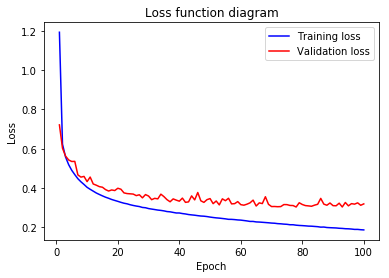

In [75]:
plot_loss_function(hist)

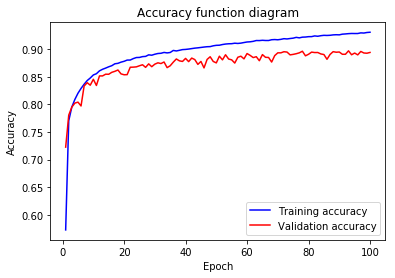

In [76]:
plot_accuracy_function(hist)

In [77]:
print("Accuracy train: " + str(hist.history['acc'][-1]))
print("Accuracy validation: " + str(hist.history['val_acc'][-1]))

Accuracy train: 0.9306833
Accuracy validation: 0.89410001039505


7 != 5
       True         Actual      Predicted


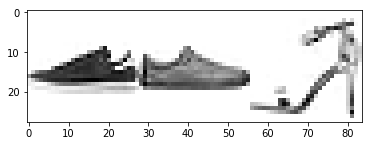

4 != 6
       True         Actual      Predicted


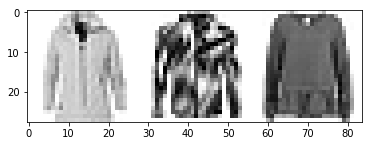

9 != 5
       True         Actual      Predicted


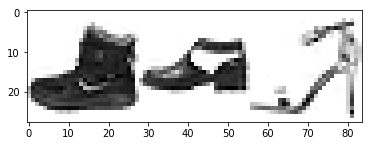

4 != 2
       True         Actual      Predicted


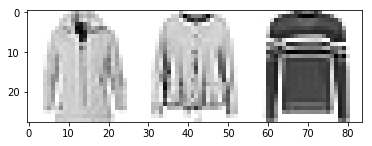

3 != 4
       True         Actual      Predicted


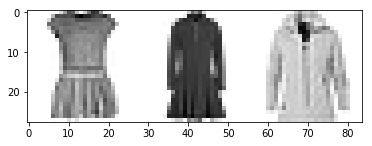

3 != 6
       True         Actual      Predicted


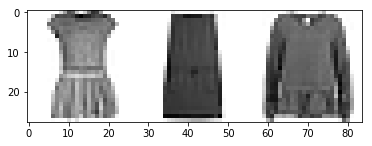

2 != 6
       True         Actual      Predicted


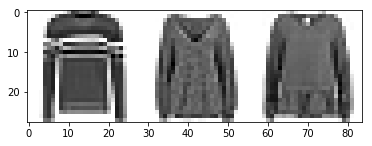

4 != 6
       True         Actual      Predicted


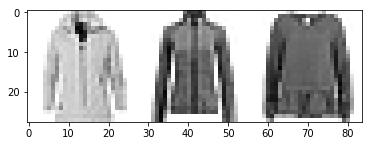

2 != 3
       True         Actual      Predicted


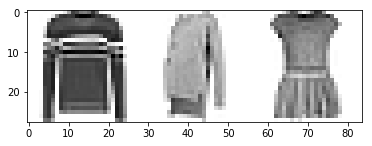

3 != 4
       True         Actual      Predicted


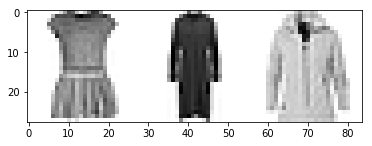

9 != 7
       True         Actual      Predicted


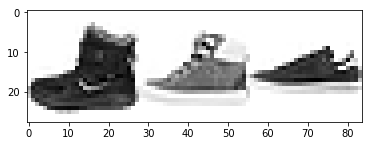

2 != 4
       True         Actual      Predicted


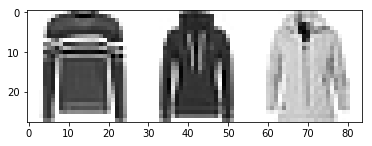

4 != 2
       True         Actual      Predicted


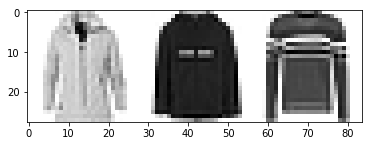

In [78]:
import time
from IPython import display
for i in range(100):
    if (y_test[i] != y_test_predictions[i]):
        im_idx_true = np.argwhere(y_train == y_test[i]).reshape(-1)[0]
        im_idx_pred = np.argwhere(y_train == y_test_predictions[i]).reshape(-1)[0]
        print(str(y_test[i]) + " != " + str(y_test_predictions[i]))
        print("       True         Actual      Predicted")
        time.sleep(3)
        plt.imshow(np.concatenate((x_train[im_idx_true], x_test[i], x_train[im_idx_pred]), axis=1), cmap='gray_r')
        plt.show()

In [79]:
print("Confusion matrix. Training data")
y_train_predictions = argmax(model.predict(scaled_x_train), 1)
print(confusion_matrix(y_train_predictions, y_train))

print("\nConfusion matrix. Testing data")
y_test_predictions = argmax(model.predict(scaled_x_test), 1)
print(confusion_matrix(y_test_predictions, y_test))

Confusion matrix. Training data
[[5569    1   82   85   10    0  634    0   23    0]
 [  10 5971    3   48    5    0   13    0    0    0]
 [  41    0 5169   16  127    0  276    0    6    0]
 [  84   23   51 5669  114    0  157    0    7    0]
 [  25    2  495  132 5668    0  705    0   21    0]
 [   0    0    0    0    0 5922    0   10    0   21]
 [ 264    2  190   48   71    0 4197    0   16    0]
 [   0    0    0    0    0   63    0 5932    1  176]
 [   7    1   10    2    5    2   18    1 5926    1]
 [   0    0    0    0    0   13    0   57    0 5802]]

Confusion matrix. Testing data
[[870   2  22  14   2   0 146   0   7   0]
 [  3 980   0  12   1   0   1   0   1   0]
 [  9   0 821   9  35   0  74   0   5   1]
 [ 17  11  10 914  35   0  35   0   4   0]
 [  8   3  93  29 905   0 144   0   8   0]
 [  1   0   0   1   0 969   0   8   0   9]
 [ 83   2  53  20  20   0 591   0   2   0]
 [  0   0   0   0   0  21   0 977   3  46]
 [  9   2   1   1   2   0   9   0 970   0]
 [  0   0   0   0 

# Conclusion

Here you are accuracies of NNs achieved on Fashion MNIST dataset.

Fashion-mnist classification <br />
* 1-layer network: (Excercies 08) <br />
Accuracy train: 0.8643 <br />
Accuracy validation: 0.8441 <br />
* Dense network: (Excercies 08) <br />
Accuracy train: 0.9387 <br />
Accuracy validation: 0.8937
* <strong>Convolutional network: (Excercies 09) <br />
Accuracy train: 0.9307 <br />
Accuracy validation: 0.8941</strong>